<a href="https://colab.research.google.com/github/aditya3477/rl-assignments/blob/main/assignement1_checkpoint5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 18.3 MB/s eta 0:00:00


In [139]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time
import random

In [140]:
class Environment(gym.Env):
    
    def __init__(self,env_choice):
        #setting up the environment
        
        self.type = env_choice

        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(5)
        self.max_timesteps = 10
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.gold_coin_pos = [1,3]
        self.monster_pos = [2,1]
        self.diamond_pos = [3,0]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 5
        self.state[tuple(self.monster_pos)] = 3
        self.state[tuple(self.gold_coin_pos)] = 2
        self.state[tuple(self.diamond_pos)] = 4

        
    def reset(self, **kwargs):

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 5
        self.state[tuple(self.monster_pos)] = 3
        self.state[tuple(self.gold_coin_pos)] = 2
        self.state[tuple(self.diamond_pos)] = 4
        observation = self.state.flatten()

        info = {}

        return observation, info
    


    def step(self, action):

      #actions to be executed by the agent
        
      if self.type == 1:
        random_number = random.random()
        if random_number < 0.9:
            if action == 0:
                self.agent_pos[0] += 1
            if action == 1:
                self.agent_pos[0] -= 1
            if action == 2:
                self.agent_pos[1] += 1
            if action == 3:
                self.agent_pos[1] -= 1
        
      else:
            if action == 0:
              self.agent_pos[0] += 1
            if action == 1:
              self.agent_pos[0] -= 1
            if action == 2:
              self.agent_pos[1] += 1
            if action == 3:
              self.agent_pos[1] -= 1

      self.agent_pos = np.clip(self.agent_pos, 0, 15)

      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 5
      self.state[tuple(self.monster_pos)] = 3
      self.state[tuple(self.gold_coin_pos)] = 2
      self.state[tuple(self.diamond_pos)] = 4
      observation = self.state.flatten()
        
       #defining different rewards 
      reward = 0
      if np.array_equal(self.agent_pos, self.goal_pos):
        reward = 1
        print("goal reached")
      if np.array_equal(self.agent_pos, self.monster_pos):
        reward = -1
        print("attacked by monster")
      if np.array_equal(self.agent_pos, self.gold_coin_pos):
        reward = 0.25
        print("gold coin collected")
      if np.array_equal(self.agent_pos, self.diamond_pos):
        reward = 0.5
        print("diamond collected")
        
      self.timestep += 1

      terminated = True if self.timestep >= self.max_timesteps else False

      info = {}
        
      return reward, terminated
        
    def render(self):
        plt.imshow(self.state)

In [141]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

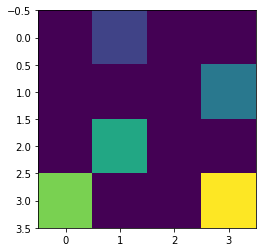

<IPython.core.display.Javascript object>

In [142]:
#to visualize the stochastic environment and run the random agent for 10 steps
env_Choice = 1
env = Environment(env_Choice)
agent = RandomAgent(env)

obs, info = env.reset()
terminated= False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  reward, terminated = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

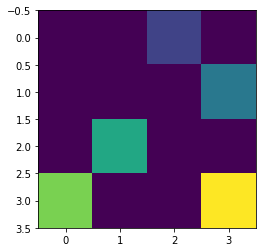

<IPython.core.display.Javascript object>

In [143]:
#to visualize the deterministic environment and run the random agent for 10 steps
env_Choice = 0
env = Environment(env_Choice)
agent = RandomAgent(env)

obs, info = env.reset()
terminated= False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  reward, terminated = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)